In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from wrangle import wrangle_data
from prepare import prepare_zillow

In [19]:
df = prepare_zillow_mvp()

In [20]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_data(df, 'taxvaluedollarcnt', modeling=True)

In [21]:
train = pd.concat([X_train, y_train], axis=1)

In [22]:
X_train.head()

,bathroomcnt_scaled,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,more_than_two_bath_scaled
11869,0.1,0.250000,0.062547,0.0
2322,0.1,0.333333,0.085209,0.0
1154,0.1,0.250000,0.050612,0.0
9048,0.3,0.416667,0.244750,1.0
11513,0.1,0.250000,0.082490,0.0


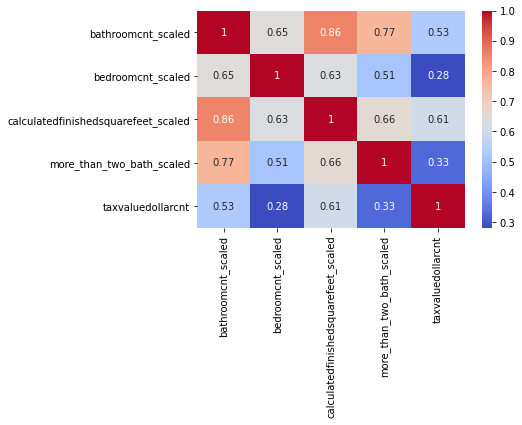

In [23]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm');

Correlation test

$H0$ There is no relationship between square feet and home value

$H1$ There is a relationship between square feet and home value 

In [24]:
confidence_interval = 0.95
alpha = 1 - confidence_interval 
t, p = stats.pearsonr(X_train.calculatedfinishedsquarefeet_scaled, y_train)

corr, p = stats.pearsonr(train['calculatedfinishedsquarefeet_scaled'], train['taxvaluedollarcnt'])
print(corr, p)

if p > alpha:
    print('We Fail to Reject H0')
else:
    print('We Reject H0a')

0.6072243309769603 0.0
We Reject H0a


We'll do a correlation test on the highest correlations (bathroom count and calculated square footage)
* $H0$ - There is no relationship between taxvaluedollarcnt and bathroomcnt"
* $Ha$ - There is a relationship between taxvaluedollarcnt and bathroomcnt

In [25]:
a = .05
corr, p = stats.pearsonr(train['bedroomcnt_scaled'], train['taxvaluedollarcnt'])
print(corr, p)
if p > a:
    print('We Fail to Reject H0')
else:
    print('We Reject H0a')

0.2804187070910192 6.955007787397899e-173
We Reject H0a


## T-test
One Tailed t-test

In [26]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_data(df, 'taxvaluedollarcnt')
train = pd.concat([X_train, y_train], axis=1)

train.head()

train.bathroomcnt.mean()

2.3309191329720718

$H0$ The average price of homes with more than two bathrooms is equal to the average price of homes with two or less bathrooms.

$H1$ Homes with more than two bathrooms have higher than average tax dollar count.

In [27]:
df_two_or_less_restrooms = train[train.bathroomcnt <= 2]
df_greater_than_two_restrooms = train[train.bathroomcnt > 2]

a = df_two_or_less_restrooms.taxvaluedollarcnt.mean()

b = df_greater_than_two_restrooms.taxvaluedollarcnt.mean()

t, p = stats.ttest_ind(df_greater_than_two_restrooms.taxvaluedollarcnt,
                df_two_or_less_restrooms.taxvaluedollarcnt)

if p > alpha:
    print('We Fail to Reject H0')
else:
    print('We Reject H0')

We Reject H0
